# Analysis in Medicare Provider Utilization and Payment Data: From the Prospectives of Average Difference between Submitted and Charged Medicare Amount from Physician in California

With the growth of older population, the need for Medicare is increasing. It is important to
understand how Medicare works and what factors would contribute to the difference in
Medicare. Medicare is the federal health insurance program for people who are 65 or older,
specific younger people with disabilities, and people with End-Stage Renal Disease
(permanent kidney failure requiring dialysis or a transplantIn this analysis. For Medicare
beneficiaries, Medicare has different types of plans, beneficiaries would choose the plan
based on their need. For providers, there are several options provided for charging medicare
patients. Generally, Medicare has established a standard allowed payment for each
procedure, if the amount of payment physicians submitted to the Medicare exceed the
allowed amount, most of the time, physicians/ providers need to cover these extra expense
(sometimes beneficiaries are required to pay the extra expense if they are out-of-network or if they opt to certain private plan). Therefore, in this analysis, I would like to focus on Average Medicare Difference (AMD), which is the difference that providers, private insurance, or beneficiaries possibly need to afford. AMD is difference between Average Medicare Allowed
Amount established by Medicare and Average Submitted Charged Amount filed by providers.

To encourage providers to accept assignment with Medicare for all their patients and become
participating providers, there are several incentives providing to participating providers. For example, Medicare payment rates for participating providers are approximately 5% or higher
than the rates paid to non-participating providers. In addition, participating providers may
receive Medicare’s reimbursement amount directly from Medicare compared to nonparticipating
providers, who generally bill their Medicare patients according to their charges
and may not receive payment from Medicare. Also, participating providers will have electronic
access to Medicare beneficiaries insurance status and make them easy to file claims to get
beneficiaries coinsurance. Formula for medicare is complicated and may depend on case by case. From the prospective of providers, it requires planning and strategies to choose optimal options to reduce the cost and maximize profit based on their entities, service, and pursuit. 

I would use statistical method and machine learning to investigate what factors would influence the difference between average Medicare submitted amount and average amount physicians charged in the provider type of Neurosurgery, Cardiac surgery, Vascular surgery, Nurse Anesthetist (CRNA),and Thoracic Surgery, in the state of California.



## Data Input

The data can be seen and downloaded at: https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Physician-and-Other-Supplier.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("medical_insurance.csv")
data.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99217,Hospital observation care discharge,N,23.0,23.0,23.0,72.680000,328.000000,54.502609,55.280870
1,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99219,Hospital observation care typically 50 minutes,N,18.0,18.0,18.0,135.850000,614.000000,100.958889,102.348889
2,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99221,"Initial hospital inpatient care, typically 30 ...",N,59.0,58.0,59.0,101.365085,333.288136,79.469661,80.859831
3,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99222,"Initial hospital inpatient care, typically 50 ...",N,132.0,130.0,132.0,139.010455,356.492424,107.933409,107.969621
4,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99223,"Initial hospital inpatient care, typically 70 ...",N,220.0,215.0,220.0,205.185955,631.186364,157.908955,160.930409


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9497892 entries, 0 to 9497891
Data columns (total 26 columns):
National Provider Identifier                                int64
Last Name/Organization Name of the Provider                 object
First Name of the Provider                                  object
Middle Initial of the Provider                              object
Credentials of the Provider                                 object
Gender of the Provider                                      object
Entity Type of the Provider                                 object
Street Address 1 of the Provider                            object
Street Address 2 of the Provider                            object
City of the Provider                                        object
Zip Code of the Provider                                    object
State Code of the Provider                                  object
Country Code of the Provider                                object
Provider Type    

In [4]:
# subset dataset to only Californa data
data_ca = data.loc[data['State Code of the Provider']=='CA']
display(data_ca.shape)

(731564, 26)

We can see that number of samples are reduced from 9+ millions to 700 thousands. Let's start to dive more into the dataset

## Exploratory Data Analysis

### Missing Value

Since there's small portion of missing values in the remaining columns, these missing values are just dropped out. 

In [5]:
# function to calculate missing value percentage
def get_missing_percentage(column):
    num = column.isnull().sum()
    total_n = len(column)
    return round(num/total_n, 2)

In [6]:
data_ca_drop = data_ca.drop(['Middle Initial of the Provider', 'National Provider Identifier','First Name of the Provider','Credentials of the Provider','Street Address 2 of the Provider','State Code of the Provider','Country Code of the Provider'], axis=1)

In [7]:
print (data_ca['Gender of the Provider'].describe())

count     691100
unique         2
top            M
freq      515106
Name: Gender of the Provider, dtype: object


we can see that gender in male accounts for almost 74% of the data. It can be inferred from the fact that generally there are more male physicians (provider) than female physicians. 

In [8]:
data_ca_drop_null = data_ca_drop[data_ca_drop.columns[data_ca_drop.isnull().any()].tolist()]
get_missing_percentage(data_ca_drop_null)

Last Name/Organization Name of the Provider    0.00
Gender of the Provider                         0.06
dtype: float64

Since there's only missing value in gender of the provider with missing at around 6%, therefore missing values were dropped. 

In [9]:
data_ca_drop = data_ca_drop.dropna()
data_ca_drop.isnull().sum()

Last Name/Organization Name of the Provider                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Code                                                  0
HCPCS Description                                           0
HCPCS Drug Indicator                                        0
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average Medicare Allowed Amount                             0
Average 

Now we don't have any missing value in the dataframe, let's look at more details in this data. First, let's create a column to show the difference between "Avergae submitted Charged Amount" and "Average Medicare Allowed Amount"

In [10]:
data_ca_drop['Average Medicare Difference'] = data_ca_drop['Average Submitted Charge Amount']- data_ca_drop['Average Medicare Allowed Amount'] 

### Subset dataframe based on Provider Type with Top 5 highest Average Medicare Difference  

Let's focus on the top 5 provider types that have the most average medicare difference. 

In [11]:
data_pt_amaa = data_ca_drop.groupby('Provider Type')['Average Medicare Difference'].mean().reset_index().sort_values('Average Medicare Difference', ascending = False).head(5)
data_pt_amaa

,Provider Type,Average Medicare Difference
75,Thoracic Surgery,1192.946294
43,Neurosurgery,1149.126776
6,Cardiac Surgery,1146.053486
79,Vascular Surgery,1042.064660
4,CRNA,882.815789


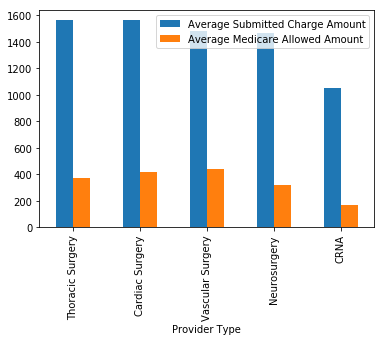

In [12]:
provider_list = ['Thoracic Surgery','Neurosurgery','Cardiac Surgery', 'Vascular Surgery', 'CRNA']
data_ca_drop_pro = data_ca_drop.loc[data_ca_drop['Provider Type'].isin(provider_list)]

# group by provider type and plot bar plot
data_ca_drop_pro.groupby('Provider Type')['Average Submitted Charge Amount','Average Medicare Allowed Amount'].mean().sort_values(by = 'Average Submitted Charge Amount', ascending = False).plot(kind = 'bar')



In [13]:
data_ca_drop_pro.groupby('Provider Type')['Average Medicare Difference'].mean().sort_values(ascending = False)

Provider Type
Thoracic Surgery    1192.946294
Neurosurgery        1149.126776
Cardiac Surgery     1146.053486
Vascular Surgery    1042.064660
CRNA                 882.815789
Name: Average Medicare Difference, dtype: float64

In [14]:
### Top 5 Average Medicare Difference Cities

We may also curious about what would average medicare difference varies among cities, here, we extract top 5 cities that have most average medicare difference:

City of the Provider
WEST HILLS        4544.530351
WILLITS           4189.692122
MARINA DEL REY    3933.719806
INGLEWOOD         3641.784906
LOS ALTOS         3608.698382
Name: Average Medicare Difference, dtype: float64

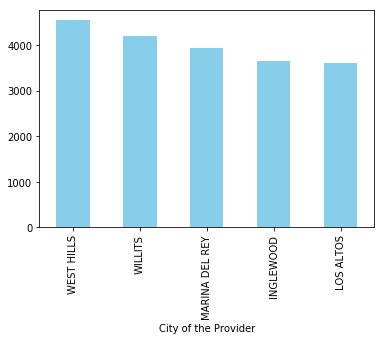

In [15]:
data_ca_drop_pro.groupby('City of the Provider')['Average Medicare Difference'].mean().sort_values(ascending = False).head(5).plot(kind = 'bar', color = 'skyblue')
data_ca_drop_pro.groupby('City of the Provider')['Average Medicare Difference'].mean().sort_values(ascending = False).head(5)

We can see that West Hills has the most difference in average medicare amount, with around $4500 Now, let's subset dataframe based on top 5 provider types.

### ZIPCODE
This section of code is referred from:
https://www.christianpeccei.com/zipmap/

In [16]:
def read_ascii_boundary(filestem):
    '''
    Reads polygon data from an ASCII boundary file.
    Returns a dictionary with polygon IDs for keys. The value for each
    key is another dictionary with three keys:
    'name' - the name of the polygon
    'polygon' - list of (longitude, latitude) pairs defining the main
    polygon boundary
    'exclusions' - list of lists of (lon, lat) pairs for any exclusions in
    the main polygon
    '''
    metadata_file = filestem + 'a.dat'
    data_file = filestem + '.dat'
    # Read metadata
    lines = [line.strip().strip('"') for line in open(metadata_file)]
    polygon_ids = lines[::6]
    polygon_names = lines[2::6]
    polygon_data = {}
    for polygon_id, polygon_name in zip(polygon_ids, polygon_names):
        # Initialize entry with name of polygon.
        # In this case the polygon_name will be the 5-digit ZIP code.
        polygon_data[polygon_id] = {'name': polygon_name}
    del polygon_data['0']
    # Read lon and lat.
    f = open(data_file)
    for line in f:
        fields = line.split()
        if len(fields) == 3:
            # Initialize new polygon
            polygon_id = fields[0]
            polygon_data[polygon_id]['polygon'] = []
            polygon_data[polygon_id]['exclusions'] = []
        elif len(fields) == 1:
            # -99999 denotes the start of a new sub-polygon
            if fields[0] == '-99999':
                polygon_data[polygon_id]['exclusions'].append([])
        else:
            # Add lon/lat pair to main polygon or exclusion
            lon = float(fields[0])
            lat = float(fields[1])
            if polygon_data[polygon_id]['exclusions']:
                polygon_data[polygon_id]['exclusions'][-1].append((lon, lat))
            else:
                polygon_data[polygon_id]['polygon'].append((lon, lat))
    return polygon_data

In [17]:
#data_ca_drop_pro['Zip Code of the Provider'] = data_ca_drop_pro['Zip Code of the Provider'].astype('str')
data_ca_drop_pro['Zip Code of the Provider'] = data_ca_drop_pro['Zip Code of the Provider'].apply(lambda x: str(x)[:5])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
# group by Zip Code of the Provider
provider_zipcode = data_ca_drop_pro.groupby('Zip Code of the Provider')['Average Medicare Difference'].mean().sort_values(ascending = False)

In [19]:
from pylab import *
avg_med_diff = {}

# Add data for each ZIP code
for i in range(provider_zipcode.shape[0]):
    avg_med_diff[provider_zipcode.index[i]] = provider_zipcode[i]
max_avg_med_diff = max(avg_med_diff.values())

In [20]:
# Read in ZIP code boundaries for California
d = read_ascii_boundary('zip5/zt06_d00')

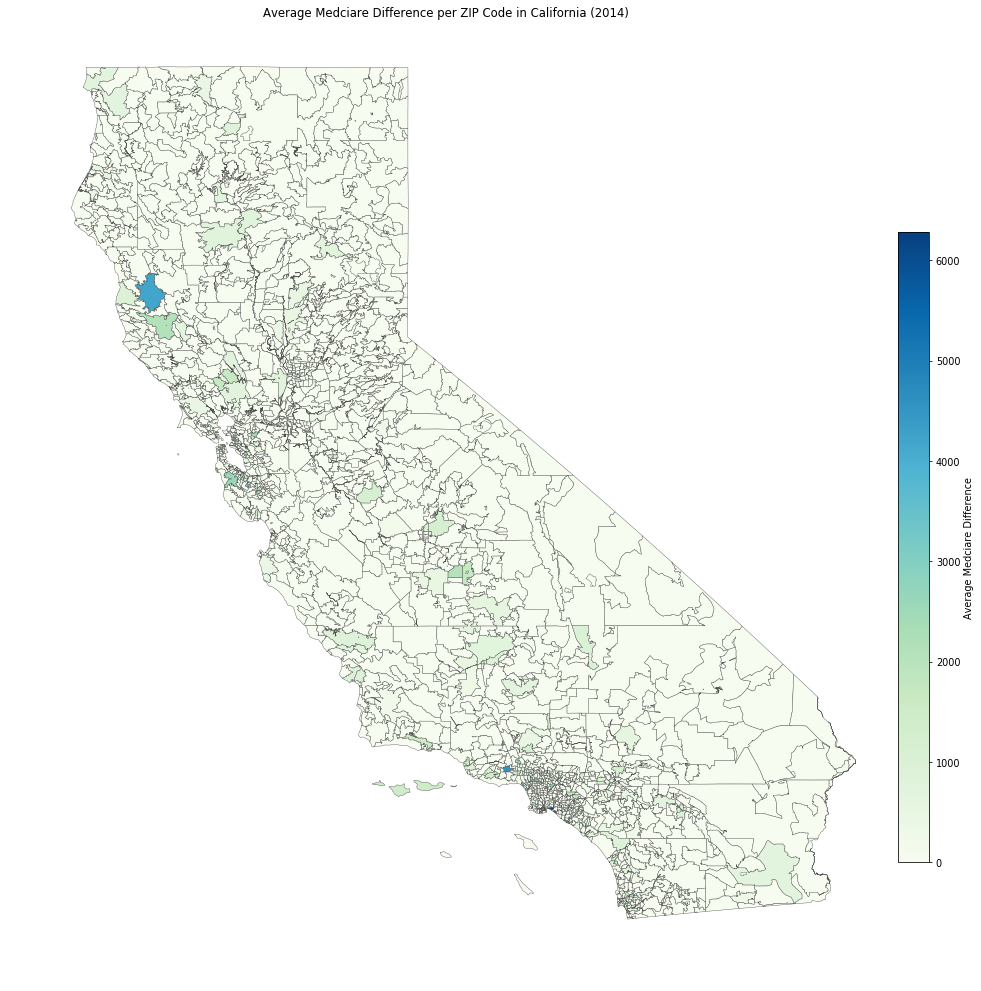

In [21]:
# Create figure and two axes: one to hold the map and one to hold
# the colorbar
figure(figsize=(15, 15), dpi=70)
map_axis = axes([0.0, 0.0, 0.8, 0.9])
cb_axis = axes([0.83, 0.1, 0.03, 0.6])

# Define colormap to color the ZIP codes.
# You can try changing this to cm.Blues or any other colormap
# to get a different effect
cmap = cm.GnBu

# Create the map axis
axes(map_axis)
axis([-125, -114, 32, 42.5])
gca().set_axis_off()

# Loop over the ZIP codes in the boundary file
for polygon_id in d:
    polygon_data = array(d[polygon_id]['polygon'])
    zipcode = d[polygon_id]['name']
    avg_med_diff_mean = avg_med_diff[zipcode] if zipcode in avg_med_diff else 0.
    
    # Define the color for the ZIP code
    fc = cmap(avg_med_diff_mean/max_avg_med_diff)
    
    # Draw the ZIP code
    patch = Polygon(array(polygon_data), facecolor=fc,
        edgecolor=(.3, .3, .3, 1), linewidth=.4)
    gca().add_patch(patch)
title('Average Medciare Difference per ZIP Code in California (2014)')

# Draw colorbar
cb = mpl.colorbar.ColorbarBase(cb_axis, cmap=cmap,
    norm = mpl.colors.Normalize(vmin=0, vmax=max_avg_med_diff))
cb.set_label('Average Medciare Difference')

In [22]:
# group by city of the provider and zipcode of the provider
data_ca_drop_pro.groupby(['City of the Provider','Zip Code of the Provider'])['Average Medicare Difference'].mean().sort_values(ascending = False).head(5)

City of the Provider  Zip Code of the Provider
SAN DIEGO             92093                       17248.377187
LONG BEACH            90803                        6280.067273
WEST HILLS            91307                        4544.530351
WILLITS               95490                        4189.692122
MARINA DEL REY        90292                        3933.719806
Name: Average Medicare Difference, dtype: float64

## Dealing with Outliers

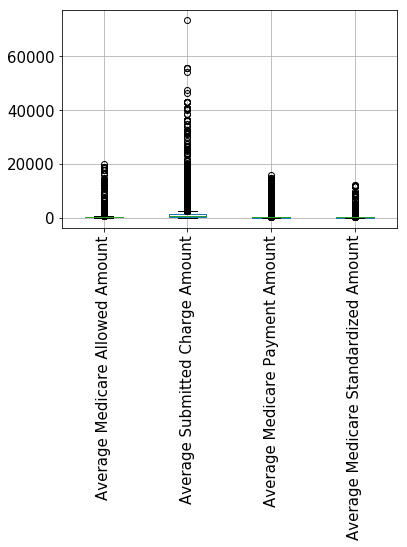

In [23]:
# outliers in numerical features of interests
boxplot = data_ca_drop_pro.boxplot(column=['Average Medicare Allowed Amount','Average Submitted Charge Amount','Average Medicare Payment Amount','Average Medicare Standardized Amount'], rot=90, fontsize=15)

[Text(0,0,'Cardiac Surgery'),
 Text(0,0,'CRNA'),
 Text(0,0,'Neurosurgery'),
 Text(0,0,'Vascular Surgery'),
 Text(0,0,'Thoracic Surgery')]

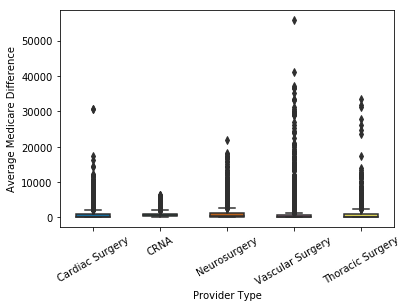

In [24]:
# outliers in each procedure
bplot = sns.boxplot(y='Average Medicare Difference', x='Provider Type', 
                 data=data_ca_drop_pro, 
                 width=0.5,
                 palette="colorblind")
bplot.set_xticklabels(bplot.get_xticklabels(),rotation=30)

We can see that there are a lot outliers in each numerical variables, yet there might be some medical meaning for these outliers, for example, maybe certain types of procedures would be very expensive. Thus we are not removing these outliers at this point. 

## Procedures in each Provider Type

In [25]:
#subset dataframe based on provider type
data_crna = data_ca_drop_pro.loc[data_ca_drop_pro['Provider Type']=='CRNA']
data_vas = data_ca_drop_pro.loc[data_ca_drop_pro['Provider Type']=='Vascular Surgery']
data_cardiac = data_ca_drop_pro.loc[data_ca_drop_pro['Provider Type']=='Cardiac Surgery']
data_thora = data_ca_drop_pro.loc[data_ca_drop_pro['Provider Type']=='Thoracic Surgery']
data_neuro = data_ca_drop_pro.loc[data_ca_drop_pro['Provider Type']=='Neurosurgery']

### Top 10 Procedures in CRNA

HCPCS Description
Anesthesia for procedure on heart and great blood vessels on heart-lung machine, age 1 year or older, or re-operation more than 1 month after original procedure    5002.128809
Anesthesia for heart artery bypass grafting on heart-lung machine                                                                                                   4772.314838
Anesthesia for kidney transplant                                                                                                                                    4252.883077
Anesthesia for procedure on spine and spinal cord                                                                                                                   3170.178024
Anesthesia for procedure on heart and great blood vessels                                                                                                           3118.022305
Anesthesia for removal of prostate                                                                    

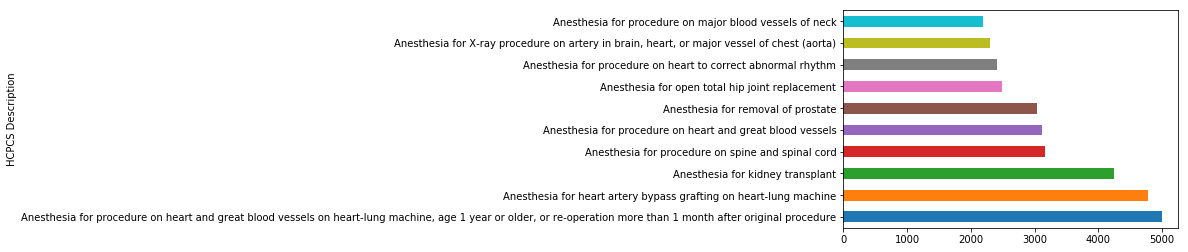

In [26]:
data_crna.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10).plot(kind ="barh")
data_crna.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10)

It seems that anesthesia for procedures on hear and great blood vessel cost has the most differences in average medicare amount, which is around $5000 USD. The procedure includes heart-lung usage, re-operation after original procedures. Further details about the frequency of these re-operating procedures and risk factors that contirbute to the re-operation can be discussed. But these questions will be left opened in the project.

### Top 10 Vascular Surgery

HCPCS Description
Removal of plaque and insertion of stents into artery in one leg, endovascular, accessed through the skin or open procedure       23740.022667
Removal of plaque and insertion of stents into arteries in one leg, endovascular, accessed through the skin or open procedure     19768.319407
Removal of plaque in arteries in one leg, endovascular, accessed through the skin or open procedure                               17688.368755
Removal of plaque in artery in one leg, endovascular, accessed through the skin or open procedure                                 14947.196645
Repair of defect of aorta in chest                                                                                                 9370.670909
Balloon dilation of artery of one leg, endovascular, accessed through the skin or open procedure                                   8738.647956
Removal of blood clot and injections (accessed through the skin) to dissolve blood clot from veins using fluoroscopic guidan

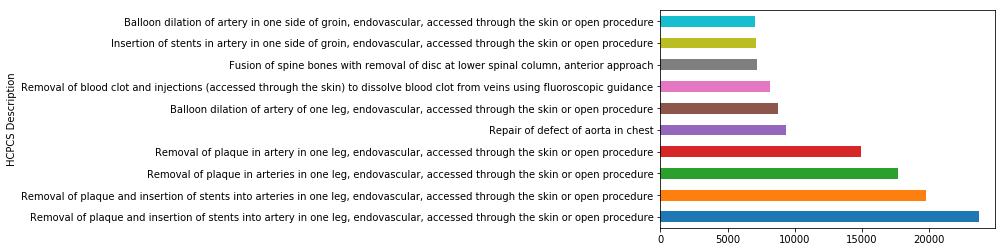

In [27]:
data_vas.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10).plot(kind ="barh")
data_vas.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10)

It seems that cost in removal of plaque and insection of stents into artery has the most differences in average medicare amount, which is $23700 USD, followed by the procedures involving removal of plaque and insection of stents into arteriers. We can see that removel of plaque and insection of stents account for top 4 average medicare amount difference procedures in Vascular Surgery. 

### Top 10 Cardiac Surgery 

HCPCS Description
Insertion of vena cava filter by endovascular approach, including radiological supervision and interpretation    30757.930833
Insertion of stents in artery in one side of groin, endovascular, accessed through the skin or open procedure    17229.114615
Heart surgery procedure                                                                                          16159.088667
Transplantation of donor heart                                                                                   14659.190000
Complete removal of inside lining of chest cavity and lung using an endoscope                                     7801.992500
Repair of hole between upper heart chambers on heart-lung machine                                                 7540.277238
Insertion of lower heart chamber blood flow assist device                                                         7303.768788
Replacement of valve between left upper and lower chambers on heart-lung machine                    

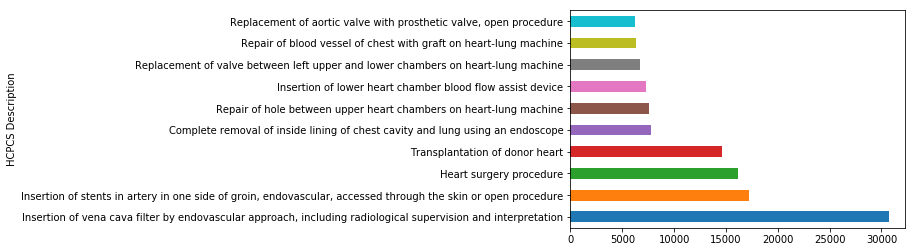

In [28]:
data_cardiac.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10).plot(kind ="barh")
data_cardiac.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10)

The bar chart shows that insection of vena cava by endovascular approach has the most difference in average medicare amount in cardiac surgery, which is $30700 USD.

### Top 10 Thoracic Surgery 

HCPCS Description
Heart surgery procedure                                                                                                                          17248.377187
Insertion of intravascular stents in vein, open or accessed through the skin, with radiological supervision and interpretation                   12753.594117
Removal of foreign body from lining of chest cavity using an endoscope                                                                           10403.839235
Placement of graft to aorta on heart-lung machine                                                                                                 9683.436511
Occlusion of venous malformations (other than hemorrhage) with radiological supervision and interpretation, roadmapping, and imaging guidance     9681.330000
Partial removal of lower esophagus                                                                                                                8841.641538
Replacement of aortic valve with p

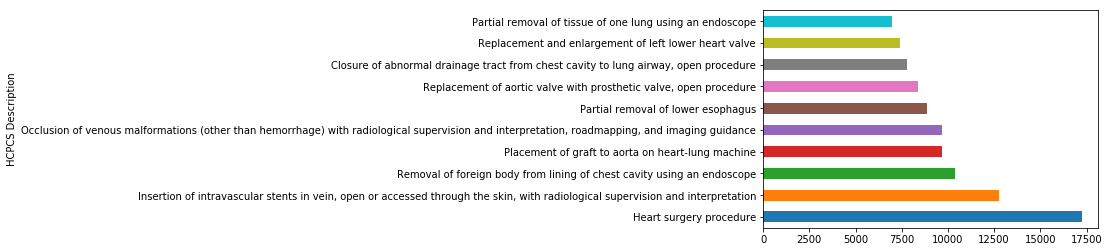

In [29]:
data_thora.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10).plot(kind ="barh")
data_thora.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10)

The procedures that involves heart surgery shows the most difference between submitted charged amount and allowed medicare amount, which is around $17200 USD. 

### Top 10 Neurosurgery

HCPCS Description
Repair of bulging of blood vessel (aneurysm) in brain                                                                                               11521.145454
Removal of middle spine bone and growth                                                                                                             10031.506923
Removal of blood clot and injections to dissolve blood clot from artery or arterial graft using fluoroscopic guidance, accessed through the skin     9610.130833
Excision of skull base for exploration or release of cranial nerves                                                                                  8217.257069
Implantation of brain neurostimulator electrodes microelectrode recording                                                                            8025.686634
Removal of pituitary gland tumor using an endoscope                                                                                                  7914.086006
Reshaping of sku

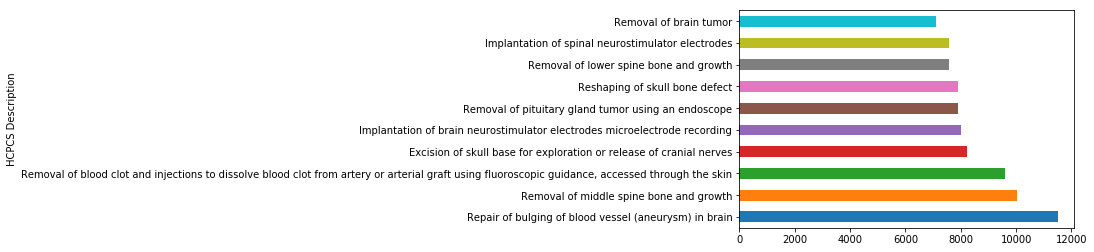

In [30]:
data_neuro.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10).plot(kind ="barh")
data_neuro.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10)

The largest difference in neruosurgery is the procedure of repairing of bulging of blood vessel in brain, which is around 11520 USD.

## Feature Exploration

### Correlation Matrix

To investigate what factors would contribute to major impact on the dependent variable - average medicare difference, and understand if independent variables have correlations, correlation matrix is applied. 

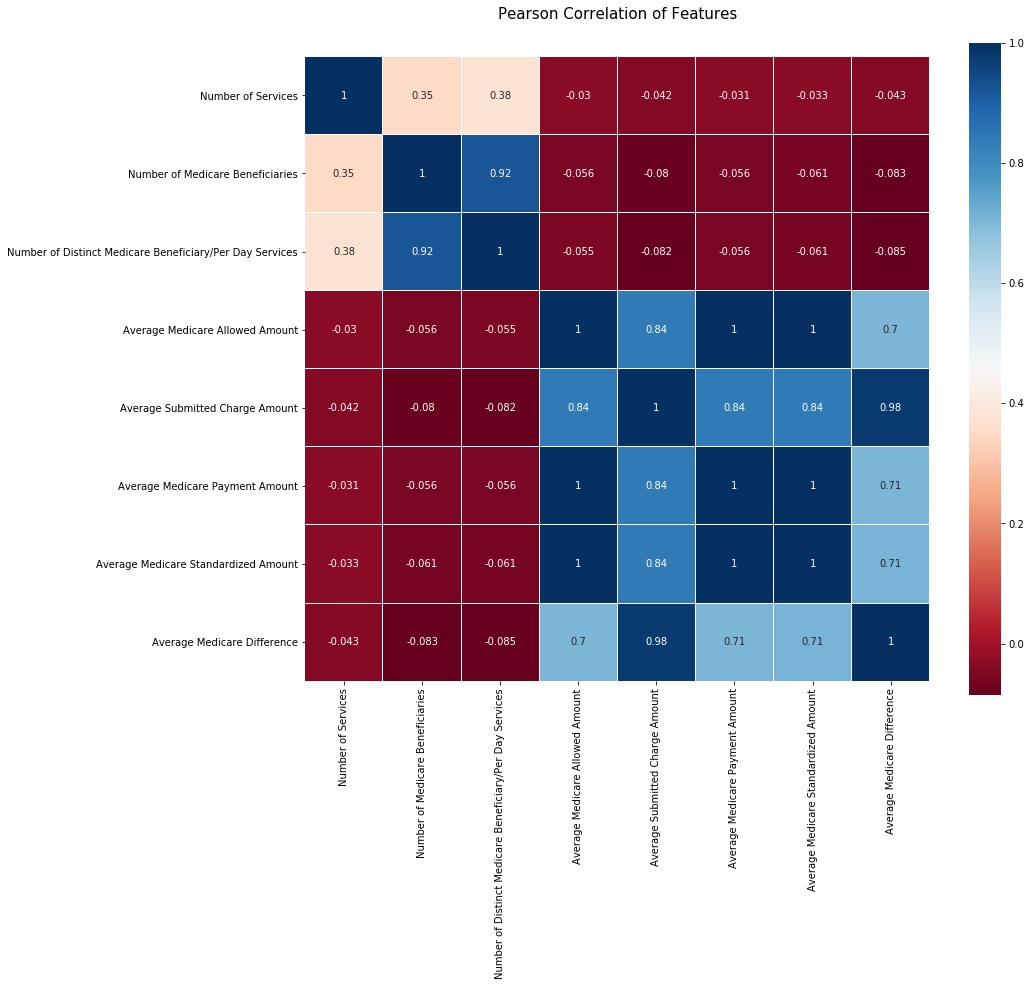

In [31]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_ca_drop_pro.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig("corrmatirx.png")

We can see that Average Medicare Allowed Amount, Average Submitted Charge Amount, Average Medicare Payment Amount,and Average Medicare Standardized Amount have higher correlation with Average Medicare Difference. We will focus on visualizing these features.

### Feature Transformation

#### Average Medicare Difference

(array([  45.,  101.,  918., 3897., 3586., 1767.,  847.,  232.,   62.,
          20.]),
 array([0.        , 0.618311  , 1.236622  , 1.85493301, 2.47324401,
        3.09155501, 3.70986601, 4.32817702, 4.94648802, 5.56479902,
        6.18311002]),
 <a list of 10 Patch objects>)

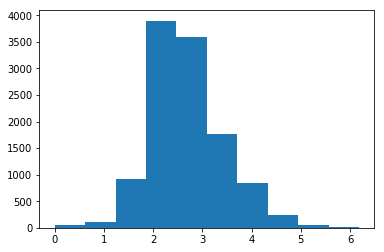

In [32]:
plt.hist(pow(data_ca_drop_pro['Average Medicare Difference'], 1/6))

#### Average Medicare Allowed Amount

(array([1.000e+00, 3.600e+01, 9.000e+00, 4.000e+01, 3.650e+02, 2.414e+03,
        6.335e+03, 1.611e+03, 5.960e+02, 6.800e+01]),
 array([-3.91202301, -2.53018528, -1.14834756,  0.23349017,  1.61532789,
         2.99716562,  4.37900334,  5.76084107,  7.14267879,  8.52451652,
         9.90635424]),
 <a list of 10 Patch objects>)

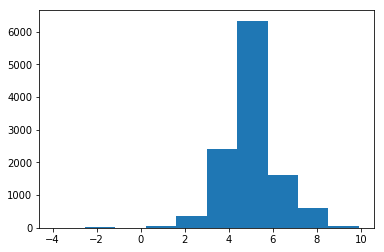

In [33]:
# log transformation of Average Medicare Allowed Amount
plt.hist(np.log(data_ca_drop_pro['Average Medicare Allowed Amount']))

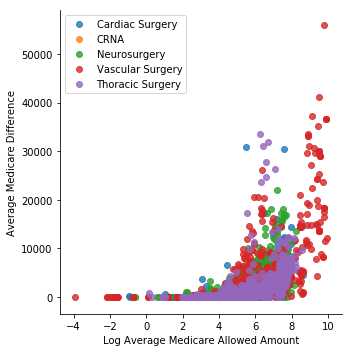

In [34]:
# copy df
data_pro_copy = data_ca_drop_pro.copy()
# log transformation of 
data_pro_copy['Log Average Medicare Allowed Amount'] = np.log(data_pro_copy['Average Medicare Allowed Amount'])
sns.lmplot(x = 'Log Average Medicare Allowed Amount', y='Average Medicare Difference', data = data_pro_copy, fit_reg = False, hue = 'Provider Type', legend = False)
plt.legend(loc='upper left')

We could see there's more variations in vascular surgery. With more allowed average medicare amoumt, there's a increasing trend in variations in average medicare difference and the amount of average medicare difference.  

#### Average Medicare Payment Amount

(array([1.000e+00, 3.600e+01, 9.000e+00, 4.000e+01, 3.720e+02, 2.581e+03,
        6.172e+03, 1.600e+03, 5.960e+02, 6.800e+01]),
 array([-4.15197368e+00, -2.77047552e+00, -1.38897737e+00, -7.47922062e-03,
         1.37401893e+00,  2.75551708e+00,  4.13701524e+00,  5.51851339e+00,
         6.90001154e+00,  8.28150969e+00,  9.66300784e+00]),
 <a list of 10 Patch objects>)

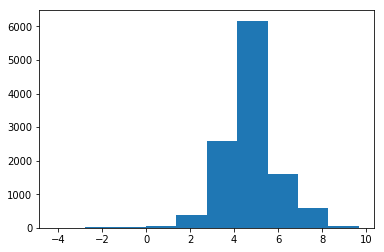

In [35]:
plt.hist(np.log(data_ca_drop_pro['Average Medicare Payment Amount']))

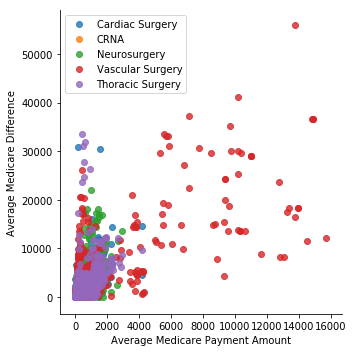

In [36]:
# scatter plot 
sns.lmplot(x = 'Average Medicare Payment Amount', y='Average Medicare Difference', data = data_ca_drop_pro, fit_reg = False, hue = 'Provider Type', legend = False)
plt.legend(loc='upper left')

The scatter plot showed that vascular surgery varied the most in average medicare payment amount that medicare covered after coinsurance amount deducted compared to other surgery, and it can be visualized that there's slightly positive correlation between average medicare payment amount and average medicare difference.

### Creating Dummy Variables, Normalization, and Data Merge

Now, I want to know that what factors would affect the average submitted charge amount. To do so, I need to get dummies for each categorical value to save space and ease computatinal complexity. 

In [37]:
# convert categorical variable to dummy variable
data_ca_drop_dummy = pd.get_dummies(data_ca_drop_pro[['Zip Code of the Provider','Entity Type of the Provider','Provider Type','Medicare Participation Indicator','HCPCS Description','HCPCS Drug Indicator','City of the Provider']])

In [38]:
# build continuous variable dataframe
data_ca_drop_continue = data_ca_drop_pro[['Number of Services','Number of Medicare Beneficiaries','Number of Distinct Medicare Beneficiary/Per Day Services','Average Medicare Payment Amount','Average Medicare Standardized Amount','Average Medicare Difference']]

In [39]:
# normalize continuous dataframe
data_ca_drop_continue = (data_ca_drop_continue-data_ca_drop_continue.min())/(data_ca_drop_continue.max()-data_ca_drop_continue.min())

In [40]:
# concat binary dataframe and continuous dataframe
data_ca_drop_dummy = pd.concat([data_ca_drop_continue,data_ca_drop_dummy], axis = 1)

After finalizing our dataframe of interest, to train, optimize, and validate the model with unseen data. I am going to divide the dataset into training dataset, validation dataset, and testing dataset, with 60%, 20%, 20%, respectively. Training dataset is used for training the data. While validation dataset is used for providing an unbiased evaluation of how training dataset fit to the data while tuning model parameters. Whereas testing dataset is used as an unseen data to evaluate the generalization of the model. 

In [41]:
from sklearn.preprocessing import StandardScaler
# run lineaqr regression model
data_ca_drop_dummy.reset_index(drop = True)
Y = data_ca_drop_dummy['Average Medicare Difference']
X = data_ca_drop_dummy.drop(['Average Medicare Difference'], axis = 1)

In [42]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test\
    = train_test_split(X, Y, test_size=0.2, random_state=1)

x_train, x_val, y_train, y_val\
    = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

In [132]:
# print ratios of training, validation, and testingset
print('Ratio for each dataset: train: {}% | validation: {}% | test {}%'.format(round(len(y_train)/len(Y),2)*100,
                                                       round(len(y_val)/len(Y),2)*100,
                                                       round(len(y_test)/len(Y),2)*100))

Ratio for each dataset: train: 68.0% | validation: 23.0% | test 10.0%


## Linear Regression Model as a Baseline Model

In [128]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [71]:
# train baseline model: linear regression
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

# train error 
print ("Linear Regression train error (RMSE): %.4f"%sqrt(mean_squared_error(y_train, model.predict(x_train))))

# validation error 
print ("Linear Regression validation error (RMSE): %.4f"%sqrt(mean_squared_error(y_val, model.predict(x_val))))

# test error 
print ("Linear Regression test error (RMSE): %.4f"%sqrt(mean_squared_error(y_test, model.predict(x_test))))      


Linear Regression train error (RMSE): 0.0266
Linear Regression validation error (RMSE): 681756581.5571
Linear Regression test error (RMSE): 386405906.3479


The validation error and test error is far more than train error, indicating that the model is horribly overfitting. Other methods will be used to improve the performance.

## Elastic Regression Model

Due to the poor performace of linear regression, we used regularization to see if we can improve the result. Generally, Lasso (L1) or Ridge (L2) regression would be applied. Lassopenalizes the model by shrinking coefficients of irrelevant vairables to 0, while Ridge does not enforce coefficient of irrelevant variables to 0, instead, it minimize their impact on the model. Lasso provides sparsity, yet it might lose some relevant independent variables along the way. Ridge is often used when the independent variables are collinear by introducing bias to reduce the variance of parameter estimates, yet it does not reduce complexity. Here, I choose to use elastic regression because it solves limitations of both regularization methods, but also keep their special properties. 

In [57]:
cv_enet = ElasticNetCV(l1_ratio = np.linspace(0.1,1,40.), cv = 10, eps = 0.001, n_alphas = 100, fit_intercept = True, normalize = True, max_iter = 2000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [58]:
cv_enet.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=array([0.1    , 0.12308, 0.14615, 0.16923, 0.19231, 0.21538, 0.23846,
       0.26154, 0.28462, 0.30769, 0.33077, 0.35385, 0.37692, 0.4    ,
       0.42308, 0.44615, 0.46923, 0.49231, 0.51538, 0.53846, 0.56154,
       0.58462, 0.60769, 0.63077, 0.65385, 0.67692, 0.7    , 0.72308,
       0.74615, 0.76923, 0.79231, 0.81538, 0.83846, 0.86154, 0.88462,
       0.90769, 0.93077, 0.95385, 0.97692, 1.     ]),
       max_iter=2000, n_alphas=100, n_jobs=1, normalize=True,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [60]:
print ("optimal l1_ratio: %.3f"%cv_enet.l1_ratio_)
print ("optimal alpha: %.6f"%cv_enet.alpha_)
print ("number of iterations : %d"%cv_enet.n_iter_)

optimal l1_ratio: 0.100
optimal alpha: 0.000022
number of iterations : 30


The l1 ratio is 0.1, which means ridge regression accounts majority part in the elastic net. This is reasonable because we may have collinearity and ridge solve collinearity issue better than lasso regressor does. 

In [129]:
# train optinal elastic net with 10-fold cross validation
kf = KFold(n_splits = 10, shuffle=True) # 10 folds 
enet_train_error = []
enet_validate_error = []
enet_test_error = []
enet_score = []
for train_idx, test_idx in kf.split(X):
    
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]
    X_train, X_val, y_train, y_val\
    = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
    
    net_model = ElasticNet(l1_ratio = cv_enet.l1_ratio_, alpha = cv_enet.alpha_, max_iter = cv_enet.n_iter_, fit_intercept = True, normalize = True)
    net_model.fit(X_train, y_train)
    
    enet_train_error.append(sqrt(mean_squared_error(y_train, net_model.predict(X_train))))
    enet_validate_error.append(sqrt(mean_squared_error(y_val, net_model.predict(X_val))))
    enet_test_error.append(sqrt(mean_squared_error(y_test, net_model.predict(X_test))))
    enet_score.append(net_model.score(X_test, y_test))


In [130]:
# elastic net training error 
print ("Elastic Net average train error (RMSE): %.4f"%np.mean(enet_train_error))

# elastic net validation error 
print ("Elastic Net avergae validation error (RMSE): %.4f"%np.mean(enet_validate_error))

# elastic net testing error 
print ("Elastic Net avergae test error (RMSE): %.4f"%np.mean(enet_test_error))  

Elastic Net average train error (RMSE): 0.0269
Elastic Net avergae validation error (RMSE): 0.0298
Elastic Net avergae test error (RMSE): 0.0300


In [131]:
# Accuracy for optinmal Elastic Net model
print("Accuracy for Random Forest after CV: ",round(np.mean(enet_score),4))

Accuracy for Random Forest after CV:  0.5784


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Predictions')

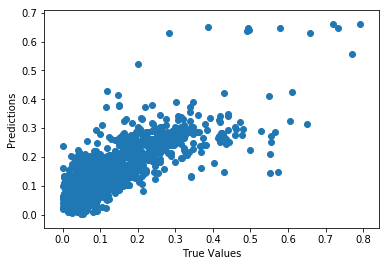

In [75]:
plt.scatter(np.sqrt(y_test), np.sqrt(net_model.predict(x_test)))
plt.xlabel("True Values")
plt.ylabel("Predictions")

With implementing Elastic Net Regularization, training error is slightly increased, from 0.026 to 0.027. While both validation error and testing error are drastically decreased, to 0.029 and 0.03, respectively. It has successfully overcome overfitting issue in the baseline linear regression model. And the accuracy of the model imporved to 0.578. Later on, I would like to see how it works by implementing other machine learning models. 

### Feature Importance from Elastic Net

In [76]:
def get_feature_importance(x_train, model):
    
    feature_importance = pd.Series(index = x_train.columns, data = np.abs(model.coef_))
    selected_features = (feature_importance>0).sum()
    print('{0:d} features, reduction of {1:2.2f}%'.format(
        selected_features,(1-selected_features/len(feature_importance))*100))
    feature_importance.sort_values().tail(10).plot(kind = 'barh', figsize = (20,8))

456 features, reduction of 63.14%


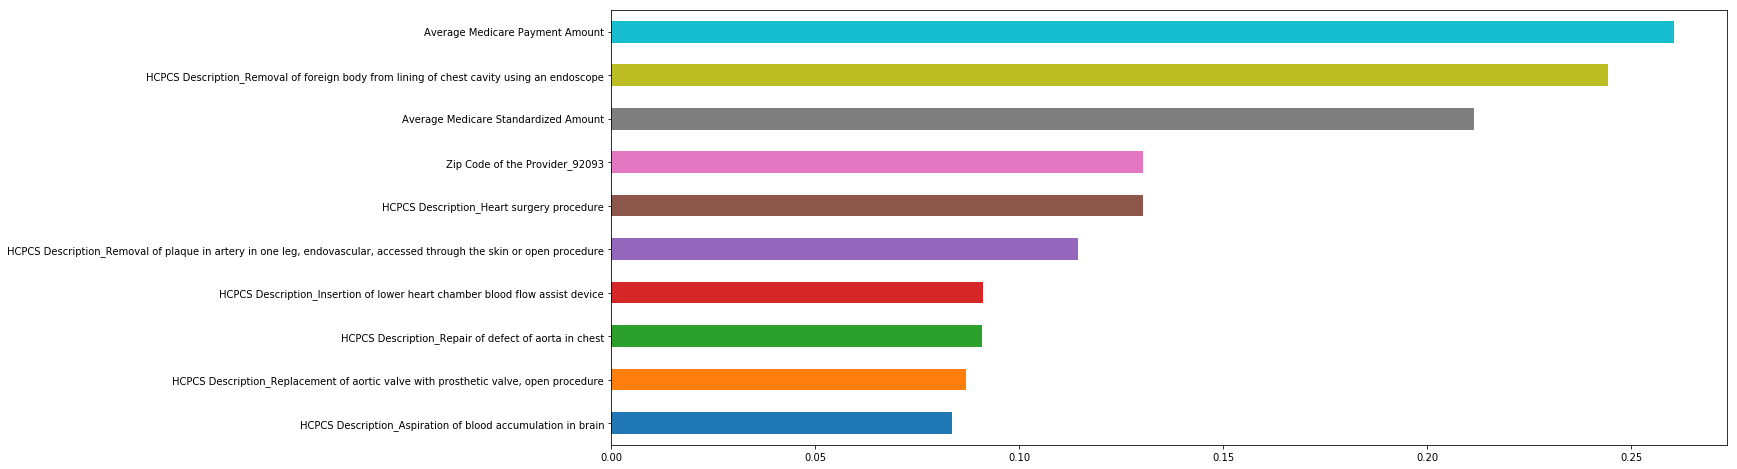

In [78]:
get_feature_importance(X, net_model)

Based on the graph above, Elastic Net model indicated that Average Medicare Payment Amount, procedure related to using an endoscope to remove forign body from chest cavity have larger impact on Average Medicare Difference. 

# Random Forest Training and Prediction

Among many training algorithms, decision tree is regarded as one of the most robust algorithms to train data and is widely used in different applications. Yet a decision tree learner may easily underfitting or overfitting, and sometimes it is expensive for a decision tree to determine the best feature to split on. Therefore, random forest has been applied to
improve a decision tree learner’s robustness and efficiency. Here, I will use grid search with 10-fold cross validation to optimize forst parameters. Average training error, average validation error, and average testing error are subsequently achieved. 

In [83]:
from sklearn.ensemble import RandomForestRegressor

# random forest model
rf = RandomForestRegressor(random_state=4)

rf_param_grid = { 
    'n_estimators': np.arange(200,1200,200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(4,10,2),
    'min_samples_leaf': np.arange(2,10,2),z
    'min_samples_split' : np.arange(6,15,3) 
}

cv_rf = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv= 10)
cv_rf.fit(x_train, y_train)


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=4, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 200,  400,  600,  800, 1000]), 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': array([4, 6, 8]), 'min_samples_leaf': array([2, 4, 6, 8]), 'min_samples_split': array([ 6,  9, 12])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [84]:
cv_rf.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [120]:
# train optinal forest with 10-fold cross validation
kf = KFold(n_splits = 10, shuffle=True) # 10 folds 
train_error = []
validate_error = []
test_error = []
rf_score = []
for train_idx, test_idx in kf.split(X):
    
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]
    X_train, X_val, y_train, y_val\
    = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
    
    opt_rf=RandomForestRegressor(random_state=4, max_features='auto', n_estimators= 200, max_depth=8, min_samples_split= 6, min_samples_leaf= 2)
    opt_rf.fit(X_train, y_train)
    
    train_error.append(sqrt(mean_squared_error(y_train, opt_rf.predict(X_train))))
    validate_error.append(sqrt(mean_squared_error(y_val, opt_rf.predict(X_val))))
    test_error.append(sqrt(mean_squared_error(y_test, opt_rf.predict(X_test))))
    rf_score.append(opt_rf.score(X_test, y_test))

In [121]:
# random forest train error 
print ("RF average train error (RMSE): %.4f"%np.mean(train_error))

# random forest validation error 
print ("RF avergae validation error (RMSE): %.4f"%np.mean(validate_error))

# random forest test error 
print ("RF avergae test error (RMSE): %.4f"%np.mean(test_error))      

RF average train error (RMSE): 0.0221
RF avergae validation error (RMSE): 0.0287
RF avergae test error (RMSE): 0.0292


In [127]:
# Accuracy for optinmal Random Forest model
print("Accuracy for Random Forest after CV: ",round(np.mean(rf_score),4))

Accuracy for Random Forest after CV:  0.5989


The result from the random forest model showed that it is indeed improved the model a little bit comparing to Elastic Net model based on the accuracy. the accuracy has been improved by 3%. Training error, validation error, and testing error are all reduced compared to the previous two models. 

### Feature Importance from Random Forest

215 features, reduction of 82.62%


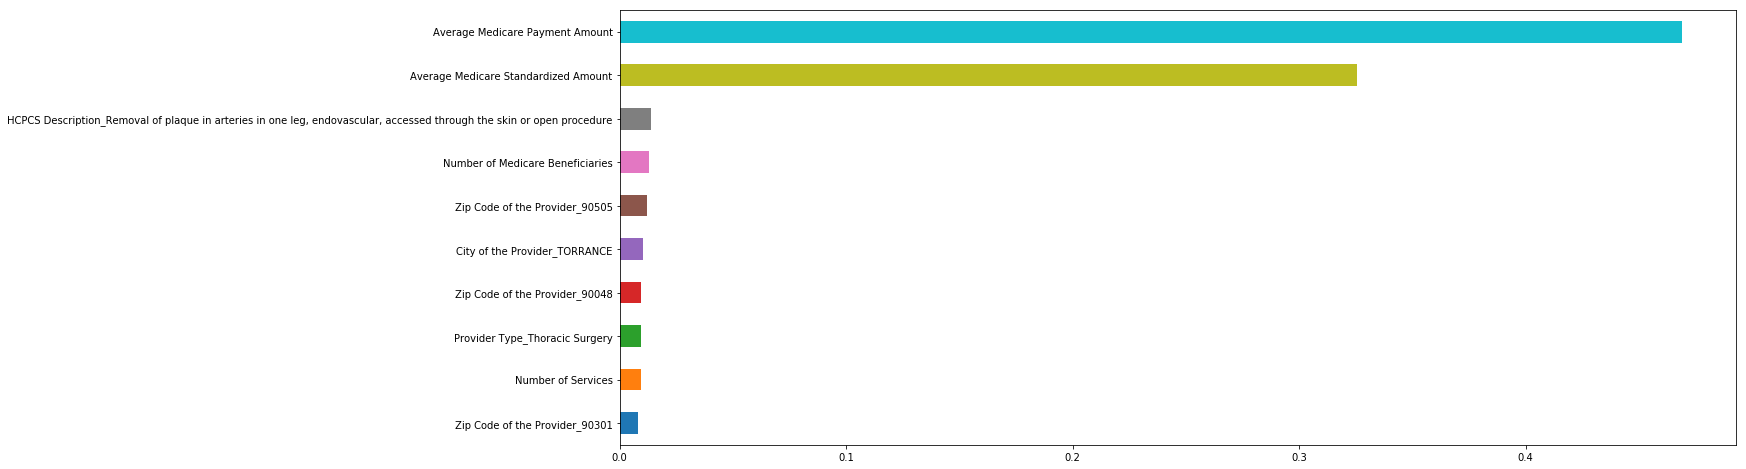

In [97]:
# feature importance
feature_importance = pd.Series(index = x_train.columns, data = np.abs(opt_rf.feature_importances_))
selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    selected_features,(1-selected_features/len(feature_importance))*100))
feature_importance.sort_values().tail(10).plot(kind = 'barh', figsize = (20,8))

It is intersting to see that the random forest model indicated the different important features comparing to Elastic Net. It showed that Average Medicare Payment Amount and Average Medicare Standardized Amount are two important features that impact Average Medicare Difference. Yet both model indicate that Average Medicare Payment Amount is the most important feature that influence Average Medicare Difference. 

In [137]:
print (y_test.shape)
print (X_test.shape)

(1147,)
(1147, 1237)


Text(0,0.5,'Predictions')

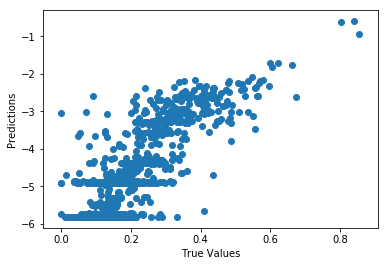

In [149]:
# scatter plot on predictions
plt.scatter(y_test**(1/3), np.log(opt_rf.predict(X_test)))
plt.xlabel("True Values")
plt.ylabel("Predictions")


Now we know whcih feaures are important for better predicting AMD, lets construct a linear regression model based on these features again.

In [103]:
import statsmodels.api as sm

model_lr_aah = sm.OLS(data_ca_drop_dummy["Average Medicare Difference"], data_ca_drop_dummy[['Average Medicare Payment Amount', 'Average Medicare Standardized Amount','HCPCS Description_Heart surgery procedure', 'HCPCS Description_Reshaping of skull bone defect']])
result_lr = model_lr_aah.fit()
display(result_lr.params)
display(result_lr.summary())


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Average Medicare Payment Amount                    -0.415092
Average Medicare Standardized Amount                0.969537
HCPCS Description_Heart surgery procedure           0.265308
HCPCS Description_Reshaping of skull bone defect    0.109472
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Average Medicare Difference   R-squared:                       0.568
Model:                                     OLS   Adj. R-squared:                  0.568
Method:                          Least Squares   F-statistic:                     3767.
Date:                         Wed, 12 Sep 2018   Prob (F-statistic):               0.00
Time:                                 15:12:02   Log-Likelihood:                 22796.
No. Observations:                        11475   AIC:                        -4.558e+04
Df Residuals:                            11471   BIC:                        -4.556e+04
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Average Medicare Payment Amount                     -0.4151      0.067     -6.225      0.000      -0.546      -0.284
Average Medicare Standardized Amount                 0.9695      0.058     16.750      0.000       0.856       1.083
HCPCS Description_Heart surgery procedure            0.2653      0.023     11.301      0.000       0.219       0.311
HCPCS Description_Reshaping of skull bone defect     0.1095      0.019      5.711      0.000       0.072       0.147
==============================================================================
Omnibus:                    11496.400   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3173593.505
Skew:                           4.343   Prob(JB):                         0.00
Kurtosis:                      84.007   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The result from linear regression showed that R-Squared was 0.57, which has been significantly improved compared to baseline linear regression model in prediction. It showed that with 0.42 unit decrease in Average Medicare Payment Amount, 0.97 unit increase in Average Medicare Standardized Amount, 0.27 increase in HCPCS Description_Heart surgery procedure, and 0.11 increase in HCPCS Description_Reshaping of skull bone defect would result in 1 unit increase in AMD. Noted that reamining other factors the same, one unit increase in procedure of heart surgery procedure would result in more than three unit increase in AMD. Similarily, one unit increase in procedure of Reshaping of skull bone defect would result in approximately 10 unit increase in AMD. 